# Data science and the food service industry: Searching for a neighborhood in Paris to open a virtual vegan restaurant in the context of the Covid-19
## Coursera/IBM Data Science Capstone Project using Python
### Using Foursquare location data, data visualization with Folium and machine learning with the k-means algorithm

This article corresponds to the final project of the IBM data science professional certificate. This project offers a good picture of what a data scientist does in real life. The goal is to identify a business problem and to solve it with location data, using specifically the platform of Foursquare, and machine learning. In this case, I will respond to a business client issue who would like to open a virtual vegan restaurant in Paris in the context of the Covid-19 crisis. To do that, I want to make a strategic recommendation on which Parisian neighbourhood is the best choice for starting one. My analysis process will be in 5 axes. I will firstly define the business problem more precisely. Then, I will describe the data sources that I use. After that, I will structure and clean the data in dataframes, and analyze them. Finally, I will make a final recommendation to the client based on the results of my analysis.

#### Summary:

I. INTRODUCTION: Description of the business problem
- I.A. Problem definition: Looking for a neighborhood to open a virtual vegan restaurant in Paris in 2021
- I.B. Target audience & interest for the case

II. DATA SOURCES: Description of the data and how it will be used to solve the problem
- II.A. Data about Parisian boroughs and neighborhoods: creation of 2 datasets in Excel based on official data extracted from Paris Data, DataFrance and the Paris Chamber of Notaries
- II.B. Data about Parisian venues: use of the Foursquare API

III. METHODOLOGY OF THE DATA ANALYSIS
- III.A. Overall methodology
- III.B. First selection of neighborhoods with the cost and marketing multiple variables
-- III.B.1. Data import and cleaning
-- III.B.2. Visualization of the first selection of neighborhoods in Paris, using Folium
- III.C. Second selection of neighborhoods with the competition variable
-- III.C.1. Import and structure of the data from Foursquare
-- III.C.2. Narrowing of the results to vegetarian / vegan restaurants and addition of the criteria of Covid-19 adapted services
- III.C.3. Preparation for data processing with machine learning
- III.C.4. First clustering of the neighborhoods with the k-means algorithm according to the percentage of vegetarian / vegan restaurants
- III.C.5. Second clustering with the Cluster 0 in function of targeted populations data
- III.C.6. Final clustering with a concatenation of clusters in function of the property price data

IV. RESULTS OF THE DATA ANALYSIS

V. DISCUSSION

VI. CONCLUSION

## I. INTRODUCTION: Description of the business problem

### I.A. Problem definition: Looking for a neighborhood to open a virtual vegan restaurant in Paris in 2021

As the French political and economic capital, Paris concentrates almost 20% of the French population and 30% of the wealth created in France. As the city of lights, Paris also centralizes culture, arts and gastronomy. In this specific case, I would like to estimate if Paris represents the ideal city to start a foodservice business even in the current context. Thus, I have been contacted by an entrepreneur who would like to open a virtual vegan restaurant in Paris which would propose home delivery and click & collect services. As an influencer, he has developed a social media activity based on vegan, healthy, rapid and affordable cooking. Due to high demand, he is thinking about extending his activity in 2021 by delivering meals to his followers based in Paris. In the context of the Covid-19 crisis, he would like to know if this project is profitable and what are the most interesting neighborhoods in Paris to open his business.  

The home delivery and the click & collect solutions are different digital solutions business people have massively developed during the crisis. The business model of the entrepreneur will be as follows: my client will rely on online pre-commands via his own website that will be promoted and relayed by his social media accounts (Instagram and Youtube). He will use a solution like Clickeat that provides a system of online commands for delivery and click & collect. Then, he will prepare the meals and finally will deliver it via outsourced partners, so his clients can eat their food at home or at work. He will follow and adapt the model of "Out Fry" from Tasty in Paris. Also, with this agile model, he will optimize the management of his stock and will prevent waste. So, the idea will be to create a “ghost kitchen”: a place where the meals will be prepared and then delivered to the consumer.

Furthermore, his ambition presents different challenges. He would like to find a place in the center of highly dense Paris in order to optimize the access to every district and the time of delivery. However, in the geographical target, the real estate cost and the global foodservice competition are very high. Consequently, he would like to know precisely with the data analysis what would be the best neighborhood to target.

### I.B. Target audience & interest for the case

Besides, different people could be also interested in this project:  
* Business people or entrepreneurs specialized in the catering and the foodservice industry, that want to see the viability of this type of project, and potentially, to adapt their business model taken into question by the current crisis,
* Investors interested about this industry and new type of business emerging with the Covid-19 context,
* Data scientists and business analysts who want to learn how to use Foursquare and machine learning techniques.

## II. DATA SOURCES: Description of the data and how it will be used to solve the problem

For this project, I will collect, analyze and compare specific information about Parisian neighborhoods in order to build my final recommendation. I will mainly combine data of Paris’ boroughs and neighborhoods extracted from different official sources and data about venues using the Foursquare API.

### II.A. Data about Parisian boroughs and neighborhoods: creation of 2 datasets in Excel based on official data extracted from Paris Data, DataFrance and the Paris Chamber of Notaries

It is important to note that Paris is organized in 20 boroughs that are administrative districts. Each of these boroughs are divided in 4 neighborhoods. So, we will look at the 80 neighborhoods of Paris.

* Dataset 1 entitled "1. Paris Boroughs & Neighborhoods Data.xlsx": this dataset gives the list of neighborhoods for each Parisian borough (designated by a postal code and a proper name). It also indicates the geographical coordinates of each neighborhood (latitude and longitude). The data have been extracted from the Paris Data website and rearranged for the project (cleaning and merger of data tables, translation of columns' titles...). More specifically, two main original datasets have been used for the creation of the dataset 1: a dataset giving information about boroughs (source: https://opendata.paris.fr/explore/dataset/arrondissements/export/?disjunctive.c_ar&disjunctive.c_arinsee&disjunctive.l_ar) and another one about neighborhoods (source: https://opendata.paris.fr/explore/dataset/quartier_paris/export/).

* Dataset 2 entitled "2. Paris Boroughs Price and Population Data.xlsx": this other dataset gives specific data about Parisian boroughs: the price per square meter, the percentage of people aged 15-29 years per borough, the percentage of people aged 30-44 years per borough, and the percentage of executives and higher intellectual professions per borough. I have chosen these data because, according to several marketing studies, people which are more interested by vegan and vegetarian food are young people and adults, with high level of education. It is important to notice that data have been limited to the borough level because of the lack of information at a higher scale. Furthermore, a classification of the boroughs has been made for each of this four variables. Indeed, in function of quartiles computed for each variable, I have determined three levels: "Low level", "Mid level" and "High level". I have built this dataset by extracting manually and associating the data taken from DataFrance on population per borough (source: http://map.datafrance.info/population?coords.lat=48.86098807882853&coords.lng=2.3166561126708984&zoom=13, date of the data: 2012), and also from the Paris Chamber of Notaries for the price per square meter per borough (date of the data: end of 2019). 

### II.B. Data about Parisian venues: use of the Foursquare API
* The API gives information about location and different venues in Paris. I will obtain names, categories and locations (longitude and latitude) for each venue.

## III. METHODOLOGY OF THE DATA ANALYSIS

### III.A. Overall methodology

My overall goal is to identify the best neighborood where to open the virtual restaurant. In order to identify it, I will compare the different neighborhoods with 3 main types of variables:

1. A cost variable: the price per square meter per borough, in order to take into account the price of acquisition of a place for the "ghost kitchen".

2. Marketing multiple variables: the percentage of targeted consumers. As I have previously explained, I will use the 3 following variables for my comparative analysis:
* The percentage of people aged 15-29 years per borough,
* The percentage of people aged 30-44 years per borough,
* The percentage of executives and higher intellectual professions per borough.

3. A competition variable: the portion of similar healthy vegan and vegetarian restaurants that propose home delivery and click & collect services. With Foursquare, combined to a list of businesses proposing these services, I will determine the number of venues per neighborhood that could compete with the business that my client wants to launch.

I will begin the comparison analysis with the cost and marketing variables, and then, I will use the competition variable.

### III.B. First selection of neighborhoods with the cost and marketing multiple variables

#### III.B.1. Data import and cleaning

Firstly, I will import Pandas and Numpy libraries, and also, datasets 1 and 2. I will then merge these two datasets in order to create my initial dataframe called "df".

In [1]:
import pandas as pd
import numpy as np
print('Libraries imported.')

Libraries imported.


In [2]:
dataset1 = pd.read_excel("1. Paris Boroughs & Neighborhoods Data.xlsx")
dataset1.drop(["Borough's number"], axis='columns', inplace=True)
dataset1.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,75001,Louvre,Halles,48.862289,2.344899
1,75001,Louvre,Palais-Royal,48.864660,2.336309
2,75001,Louvre,Saint-Germain-l'Auxerrois,48.860650,2.334910
3,75001,Louvre,Place-Vendôme,48.867019,2.328582
4,75002,Bourse,Mail,48.868008,2.344699


In [3]:
dataset2 = pd.read_excel("2. Paris Boroughs Price and Population Data.xlsx")
dataset2.head()

,Postal code,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions
0,75001,12840,High level,23,Low level,26,High level,36,High level
1,75002,11250,Mid level,27,High level,30,High level,37,High level
2,75003,12260,High level,24,Mid level,28,High level,36,High level
3,75004,12790,High level,25,High level,23,Mid level,33,High level
4,75005,12140,High level,29,High level,20,Low level,32,Mid level


In [4]:
df = pd.merge(dataset1, dataset2, on='Postal code')
df

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions
0,75001,Louvre,Halles,48.862289,2.344899,12840,High level,23,Low level,26,High level,36,High level
1,75001,Louvre,Palais-Royal,48.864660,2.336309,12840,High level,23,Low level,26,High level,36,High level
2,75001,Louvre,Saint-Germain-l'Auxerrois,48.860650,2.334910,12840,High level,23,Low level,26,High level,36,High level
3,75001,Louvre,Place-Vendôme,48.867019,2.328582,12840,High level,23,Low level,26,High level,36,High level
4,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,27,High level,30,High level,37,High level
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75019,Buttes-Chaumont,Combat,48.878639,2.380127,8490,Low level,22,Low level,23,Mid level,19,Low level
76,75020,Ménilmontant,Père-Lachaise,48.863719,2.395273,8560,Low level,21,Low level,24,Mid level,21,Low level
77,75020,Ménilmontant,Belleville,48.871531,2.387549,8560,Low level,21,Low level,24,Mid level,21,Low level
78,75020,Ménilmontant,Saint-Fargeau,48.871035,2.406172,8560,Low level,21,Low level,24,Mid level,21,Low level


Then, in order to narrow my data, I will suppress the cells that don't match my targets.
* For the level of % of people aged 15-29 years, I suppress rows with low level, as I am targeting boroughs/neighborhoods with high or mid levels.
* For the level of % of people aged 30-44 years, I suppress rows with low level, as I am targeting boroughs/neighborhoods with high or mid levels.
* For the level of % of executives and higher intellectual professions, I suppress rows with low level, as I am targeting boroughs/neighborhoods with high or mid levels.
* For the level of price per square metre, I suppress all rows that present a high level, as I am looking for affordable locations.

In [5]:
df = df[df['Level of % of people aged 15-29 yrs']!='Low level']
df = df[df['Level of % of people aged 30-44 yrs']!='Low level']
df = df[df['Level of % of executives and higher intellectual professions']!='Low level']
df = df[df['Level of price per square metre']!='High level']
df

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions
4,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,27,High level,30,High level,37,High level
5,75002,Bourse,Bonne-Nouvelle,48.867150,2.350080,11250,Mid level,27,High level,30,High level,37,High level
6,75002,Bourse,Gaillon,48.869307,2.333432,11250,Mid level,27,High level,30,High level,37,High level
7,75002,Bourse,Vivienne,48.869100,2.339461,11250,Mid level,27,High level,30,High level,37,High level
32,75009,Opéra,Rochechouart,48.879812,2.344861,10730,Mid level,24,Mid level,26,High level,36,High level
33,75009,Opéra,Saint-Georges,48.879934,2.332850,10730,Mid level,24,Mid level,26,High level,36,High level
34,75009,Opéra,Chaussée-d'Antin,48.873547,2.332269,10730,Mid level,24,Mid level,26,High level,36,High level
35,75009,Opéra,Faubourg-Montmartre,48.873935,2.343253,10730,Mid level,24,Mid level,26,High level,36,High level
36,75010,Entrepôt,Hôpital-Saint-Louis,48.876008,2.368123,9730,Low level,24,Mid level,28,High level,31,Mid level
37,75010,Entrepôt,Porte-Saint-Denis,48.873618,2.352283,9730,Low level,24,Mid level,28,High level,31,Mid level


In [6]:
print(df.shape)

(24, 13)


In [7]:
df['Borough'].value_counts()

Popincourt             4
Batignolles-Monceau    4
Opéra                  4
Entrepôt               4
Bourse                 4
Vaugirard              4
Name: Borough, dtype: int64

As a result, I obtain a final dataframe with 24 potential neighborhoods to target, which are concentrated in 6 main boroughs: Bourse, Opéra, Entrepôt, Popincourt, Vaugirard and Batignolles-Monceau.

#### III.B.2. Visualization of the first selection of neighborhoods in Paris, using Folium

Then, I want to visualize my first results on a map of Paris with the Folium library. I add the geographical coordinates of Paris by referring to the GeoPy library, and combine them with the coordinates of the Parisian neighborhoods that I have selected. The map represents the neighborhoods in purple points. For each point, a data label indicates the names of the neighborhood and of the borough.

In [8]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
print('Library imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.12.8-~ --> conda-forge::ca-certificates-2020.12.5-ha878542_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Library imported.


In [9]:
# We need to define a "user agent" in order to define an instance of the geocoder: we will call it "Paris_Explorer".
address = 'Paris'
geolocator = Nominatim(user_agent="Paris_Explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Paris are 48.8566969, 2.3514616.


In [10]:
import folium
Map_Paris = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='strong blue',
        fill=True,
        fill_color='#3139cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Paris)  
Map_Paris

## III.C. Second selection of neighborhoods with the competition variable

#### III.C.1. Import and structure of the data from Foursquare

Now, I will narrow the analysis adding the competition variable. I start using the Foursquare API to retrieve nearby venues information in the selected neighborhoods (that is to say, names, locations and category types). My research is limited to 100 venues for each neighborhood and within a radius of 500 meters. The API returns a JSON file with all venues data that I transform into a dataframe. In this dataframe, I add the information about the corresponding neighborhood for each venue: name and geographical coordinates (see below).

In [11]:
# New libraries:
import requests
import json
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


In [12]:
# Foursquare credentials and version:
CLIENT_ID = 'OJZRL40LM3MTQXYIL0XCH2YNMNE0042ICVXQ53HSOACCPHME'
CLIENT_SECRET = 'UT41UTELNEUSBBNCAUHWTITJAG2IVA5CJV2NPBEQCCUSBFHB'
VERSION = '20180605'
LIMIT = 100
radius=500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OJZRL40LM3MTQXYIL0XCH2YNMNE0042ICVXQ53HSOACCPHME
CLIENT_SECRET: UT41UTELNEUSBBNCAUHWTITJAG2IVA5CJV2NPBEQCCUSBFHB


In [13]:
# Function to explore all of the nearby venues in Paris:

def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # API request URL:
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
            
        # Get request:
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Relevant information for each nearby venue:
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# Creation of a new dataframe:
paris_venues = getNearbyVenues(names=df['Neighborhood'],latitudes=df['Latitude'],longitudes=df['Longitude'])

Mail
Bonne-Nouvelle
Gaillon
Vivienne
Rochechouart
Saint-Georges
Chaussée-d'Antin
Faubourg-Montmartre
Hôpital-Saint-Louis
Porte-Saint-Denis
Saint-Vincent-de-Paul
Porte-Saint-Martin
Sainte-Marguerite
Saint-Ambroise
Folie-Méricourt
Roquette
Grenelle
Necker
Saint-Lambert
Javel
Batignolles
Epinettes
Ternes
Plaine de Monceaux


In [15]:
paris_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mail,48.868008,2.344699,Hoppy Corner,48.867726,2.347375,Beer Bar
1,Mail,48.868008,2.344699,L'Appartement Sézane,48.869574,2.345060,Women's Store
2,Mail,48.868008,2.344699,Lockwood,48.867727,2.346945,Cocktail Bar
3,Mail,48.868008,2.344699,Le Moderne,48.868856,2.342142,French Restaurant
4,Mail,48.868008,2.344699,Librairie Gourmande,48.866951,2.343996,Bookstore
...,...,...,...,...,...,...,...
1728,Plaine de Monceaux,48.885044,2.302910,Hotel Mercure Paris 17 Batignolles,48.888060,2.306772,Hotel
1729,Plaine de Monceaux,48.885044,2.302910,Bibimbaps,48.887956,2.307274,Korean Restaurant
1730,Plaine de Monceaux,48.885044,2.302910,Rendez Vous de Midi,48.887552,2.297806,Sandwich Place
1731,Plaine de Monceaux,48.885044,2.302910,Nagano,48.889087,2.305391,Japanese Restaurant


In total, I obtain 1730 venues for all targeted neighborhoods.

#### III.C.2. Narrowing of the results to vegetarian / vegan restaurants and addition of the criteria of Covid-19 adapted services

Then, I narrow venues information to a specific venue category: vegetarian and vegan restaurants. I also don’t forget to drop potential duplicates. Indeed, some venues appear twice in different bordering neighborhoods.

In [16]:
# Narrowing to the category of vegetarian / vegan restaurants: 
paris_veg = paris_venues[paris_venues['Venue Category']=='Vegetarian / Vegan Restaurant']
paris_veg

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
176,Bonne-Nouvelle,48.867150,2.350080,Kitchen,48.864536,2.354567,Vegetarian / Vegan Restaurant
398,Rochechouart,48.879812,2.344861,Le Potager de Charlotte,48.878924,2.344640,Vegetarian / Vegan Restaurant
448,Rochechouart,48.879812,2.344861,VG,48.877055,2.347964,Vegetarian / Vegan Restaurant
462,Rochechouart,48.879812,2.344861,42 Degrés,48.877462,2.349138,Vegetarian / Vegan Restaurant
650,Faubourg-Montmartre,48.873935,2.343253,So Nat,48.876277,2.338614,Vegetarian / Vegan Restaurant
658,Faubourg-Montmartre,48.873935,2.343253,Le Tricycle,48.875576,2.349075,Vegetarian / Vegan Restaurant
684,Faubourg-Montmartre,48.873935,2.343253,La Palanche D'âulac,48.878265,2.342580,Vegetarian / Vegan Restaurant
703,Faubourg-Montmartre,48.873935,2.343253,VG,48.877055,2.347964,Vegetarian / Vegan Restaurant
731,Hôpital-Saint-Louis,48.876008,2.368123,Bodhi Vegan,48.875830,2.370180,Vegetarian / Vegan Restaurant
750,Hôpital-Saint-Louis,48.876008,2.368123,Sol Semilla,48.873157,2.363202,Vegetarian / Vegan Restaurant


In [17]:
# Suppression of duplicates and keeping of first occurrences:
paris_veg = paris_veg.drop_duplicates(subset=['Venue','Venue Latitude','Venue Longitude'], keep="first")
paris_veg

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
176,Bonne-Nouvelle,48.867150,2.350080,Kitchen,48.864536,2.354567,Vegetarian / Vegan Restaurant
398,Rochechouart,48.879812,2.344861,Le Potager de Charlotte,48.878924,2.344640,Vegetarian / Vegan Restaurant
448,Rochechouart,48.879812,2.344861,VG,48.877055,2.347964,Vegetarian / Vegan Restaurant
462,Rochechouart,48.879812,2.344861,42 Degrés,48.877462,2.349138,Vegetarian / Vegan Restaurant
650,Faubourg-Montmartre,48.873935,2.343253,So Nat,48.876277,2.338614,Vegetarian / Vegan Restaurant
658,Faubourg-Montmartre,48.873935,2.343253,Le Tricycle,48.875576,2.349075,Vegetarian / Vegan Restaurant
684,Faubourg-Montmartre,48.873935,2.343253,La Palanche D'âulac,48.878265,2.342580,Vegetarian / Vegan Restaurant
731,Hôpital-Saint-Louis,48.876008,2.368123,Bodhi Vegan,48.875830,2.370180,Vegetarian / Vegan Restaurant
750,Hôpital-Saint-Louis,48.876008,2.368123,Sol Semilla,48.873157,2.363202,Vegetarian / Vegan Restaurant
809,Porte-Saint-Denis,48.873618,2.352283,Jah Jah,48.873179,2.353031,Vegetarian / Vegan Restaurant


In [18]:
paris_veg.shape

(14, 7)

In total, I obtain 14 results of vegetarian / vegan restaurants in Paris.

In the context of the Covid-19, I also add two dining options criteria to measure if the venues have adapted their services. Both sub-variables are the possibility of home delivery (by the restaurant or specialized firms such as Uber Eats, Deliveroo and Just Eat) and takeaway/click & collect. Referring to local files of Google My Business, I have consolidated an Excel file with the information for each restaurant: it's called "3. Paris List of Vegan & Vegetarian restaurants with Covid-19 adapted services".

In [19]:
dataset3 = pd.read_excel("3. Paris List of Vegan & Vegetarian restaurants with Covid-19 adapted services.xlsx")
dataset3

,Venue,Delivery,Take-away and/or click & collect
0,Kitchen,0,1
1,Le Potager de Charlotte,1,1
2,VG Pâtisserie,0,1
3,42 Degrés,1,1
4,So Nat,1,1
5,Le Tricycle,0,1
6,La Palanche D'âulac,1,1
7,Bodhi Vegan,1,1
8,Sol Semilla,1,1
9,Jah Jah,0,1


In [20]:
paris_veg = pd.merge(paris_veg, dataset3,on="Venue")
paris_veg

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Delivery,Take-away and/or click & collect
0,Bonne-Nouvelle,48.867150,2.350080,Kitchen,48.864536,2.354567,Vegetarian / Vegan Restaurant,0,1
1,Rochechouart,48.879812,2.344861,Le Potager de Charlotte,48.878924,2.344640,Vegetarian / Vegan Restaurant,1,1
2,Rochechouart,48.879812,2.344861,42 Degrés,48.877462,2.349138,Vegetarian / Vegan Restaurant,1,1
3,Faubourg-Montmartre,48.873935,2.343253,So Nat,48.876277,2.338614,Vegetarian / Vegan Restaurant,1,1
4,Faubourg-Montmartre,48.873935,2.343253,Le Tricycle,48.875576,2.349075,Vegetarian / Vegan Restaurant,0,1
5,Faubourg-Montmartre,48.873935,2.343253,La Palanche D'âulac,48.878265,2.342580,Vegetarian / Vegan Restaurant,1,1
6,Hôpital-Saint-Louis,48.876008,2.368123,Bodhi Vegan,48.875830,2.370180,Vegetarian / Vegan Restaurant,1,1
7,Hôpital-Saint-Louis,48.876008,2.368123,Sol Semilla,48.873157,2.363202,Vegetarian / Vegan Restaurant,1,1
8,Porte-Saint-Denis,48.873618,2.352283,Jah Jah,48.873179,2.353031,Vegetarian / Vegan Restaurant,0,1
9,Porte-Saint-Martin,48.871245,2.361504,Elaichi,48.869569,2.355699,Vegetarian / Vegan Restaurant,1,1


Thus, I can see that all restaurants propose at least a take-away and/or click & collect dining option. Only 4 venues don't also guarantee a delivery service. Consequently, as every restaurant have adapted its services, I won't consider dining options as discriminatory criteria.

#### III.C.3. Preparation for data processing with machine learning

I will now obtain and/or compute 5 sub-variables for each neighborhood:
* The list of names of vegetarian / vegan restaurants per neighborhood for possible benchmark,
* The absolute number of vegetarian / vegan restaurants per neighborhood that we can visualize at the end of the analysis,
* The number of restaurants with a delivery service per neighborhood,
* The number of restaurants with take-away and/or click & collect services per neighborhood.
* The more precise percentage of vegetarian / vegan restaurants per neighborhood that I will use after for data processing in machine learning. I compute this percentage with the method of “one-hot encoding”. The idea is to convert the data obtained for all category types into numerical and binary vectors that we called “dummies”. For that, I compute the frequency of occurrence of all category types for each venue, and then, I group the results by computing the mean of the frequencies for each neighborhood. Then, I only keep the data obtained for the category of “vegetarian / vegan restaurant”. As a consequence, I can use these final results as inputs for the application of the k-means algorithm. 

* List of vegetarian / vegan restaurants per neighborhood:

In [21]:
paris_1 = paris_veg.groupby(['Neighborhood'], as_index=False).agg(lambda x: ','.join(x))
paris_1 = paris_1[['Neighborhood', 'Venue']]
paris_1 = paris_1.rename(columns={"Venue":"List of Vegetarian / Vegan Restaurants"})
paris_1

,Neighborhood,List of Vegetarian / Vegan Restaurants
0,Batignolles,My Kitch'n
1,Bonne-Nouvelle,Kitchen
2,Faubourg-Montmartre,"So Nat,Le Tricycle,La Palanche D'âulac"
3,Folie-Méricourt,Soya Cantine Bio
4,Hôpital-Saint-Louis,"Bodhi Vegan,Sol Semilla"
5,Porte-Saint-Denis,Jah Jah
6,Porte-Saint-Martin,Elaichi
7,Rochechouart,"Le Potager de Charlotte,42 Degrés"
8,Roquette,Aujourd’hui & Demain


* Computation of the absolute number of vegetarian / vegan restaurants per neighborhood:

In [22]:
# Number of vegetarian / vegan restaurants per neighborhood:
paris_2 = paris_veg.groupby('Neighborhood').count().reset_index()
paris_2 = paris_2.sort_values(by = 'Venue', ascending = False)
paris_2 = paris_2[['Neighborhood', 'Venue']]
paris_2 = paris_2.rename(columns={"Venue":"Number of Vegetarian / Vegan Restaurants"})
paris_2

,Neighborhood,Number of Vegetarian / Vegan Restaurants
2,Faubourg-Montmartre,3
4,Hôpital-Saint-Louis,2
7,Rochechouart,2
0,Batignolles,1
1,Bonne-Nouvelle,1
3,Folie-Méricourt,1
5,Porte-Saint-Denis,1
6,Porte-Saint-Martin,1
8,Roquette,1


* Computation of the number of restaurants with a delivery service and the number of restaurants with take-away and/or click & collect services per neighborhood:

In [23]:
paris_3 = pd.DataFrame(paris_veg.groupby('Neighborhood')['Delivery','Take-away and/or click & collect'].sum())
paris_3 = paris_3.rename(columns={"Delivery":"Number of V/V restaurants with a delivery service","Take-away and/or click & collect":"Number of V/V restaurants with take-away and/or click & collect services"})
paris_3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services
Neighborhood,,
Batignolles,0,1
Bonne-Nouvelle,0,1
Faubourg-Montmartre,2,3
Folie-Méricourt,1,1
Hôpital-Saint-Louis,2,2
Porte-Saint-Denis,0,1
Porte-Saint-Martin,1,1
Rochechouart,2,2
Roquette,1,1


* Computation of the percentage of vegetarian / vegan restaurants per neighborhood:

In [24]:
# Creation of a new dataframe and rows grouped by neighborhood and by taking the mean of the frequency of occurrence of each category:
paris_venues = paris_venues.drop_duplicates(subset=['Venue'], keep="first")
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]
paris_4 = paris_onehot.groupby('Neighborhood').mean().reset_index()
# Extract of the "Neighborhood" and "Vegetarian / Vegan Restaurant" columns:
paris_4 = paris_4[['Neighborhood', 'Vegetarian / Vegan Restaurant']]
paris_4 = paris_4.rename(columns={"Vegetarian / Vegan Restaurant":"% of Vegetarian / Vegan restaurants"})
paris_4

,Neighborhood,% of Vegetarian / Vegan restaurants
0,Batignolles,0.010204
1,Bonne-Nouvelle,0.017544
2,Chaussée-d'Antin,0.000000
3,Epinettes,0.000000
4,Faubourg-Montmartre,0.050847
5,Folie-Méricourt,0.013514
6,Gaillon,0.000000
7,Grenelle,0.000000
8,Hôpital-Saint-Louis,0.020202
9,Javel,0.000000


* Merger of all previous dataframes with the initial one in order to have an exhaustive picture of the situation: I merge the 5 sub-variables that I have obtained to my initial dataframe in order to have an exhaustive picture of the situation.

In [25]:
from functools import reduce
paris_all = [df,paris_4,paris_2, paris_3,paris_1]
paris_merge = reduce(lambda left,right: pd.merge(left,right,on=['Neighborhood'],how='outer'), paris_all).fillna(0)
paris_merge = paris_merge.sort_values(by ='Number of Vegetarian / Vegan Restaurants', ascending=False)
paris_merge

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
7,75009,Opéra,Faubourg-Montmartre,48.873935,2.343253,10730,Mid level,24,Mid level,26,High level,36,High level,0.050847,3.0,2.0,3.0,"So Nat,Le Tricycle,La Palanche D'âulac"
4,75009,Opéra,Rochechouart,48.879812,2.344861,10730,Mid level,24,Mid level,26,High level,36,High level,0.043478,2.0,2.0,2.0,"Le Potager de Charlotte,42 Degrés"
8,75010,Entrepôt,Hôpital-Saint-Louis,48.876008,2.368123,9730,Low level,24,Mid level,28,High level,31,Mid level,0.020202,2.0,2.0,2.0,"Bodhi Vegan,Sol Semilla"
20,75017,Batignolles-Monceau,Batignolles,48.888482,2.313856,10210,Mid level,24,Mid level,24,Mid level,31,Mid level,0.010204,1.0,0.0,1.0,My Kitch'n
9,75010,Entrepôt,Porte-Saint-Denis,48.873618,2.352283,9730,Low level,24,Mid level,28,High level,31,Mid level,0.019231,1.0,0.0,1.0,Jah Jah
11,75010,Entrepôt,Porte-Saint-Martin,48.871245,2.361504,9730,Low level,24,Mid level,28,High level,31,Mid level,0.023256,1.0,1.0,1.0,Elaichi
1,75002,Bourse,Bonne-Nouvelle,48.867150,2.350080,11250,Mid level,27,High level,30,High level,37,High level,0.017544,1.0,0.0,1.0,Kitchen
14,75011,Popincourt,Folie-Méricourt,48.867403,2.372965,9980,Mid level,25,High level,27,High level,31,Mid level,0.013514,1.0,1.0,1.0,Soya Cantine Bio
15,75011,Popincourt,Roquette,48.857064,2.380364,9980,Mid level,25,High level,27,High level,31,Mid level,0.013889,1.0,1.0,1.0,Aujourd’hui & Demain
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,27,High level,30,High level,37,High level,0.000000,0.0,0.0,0.0,0


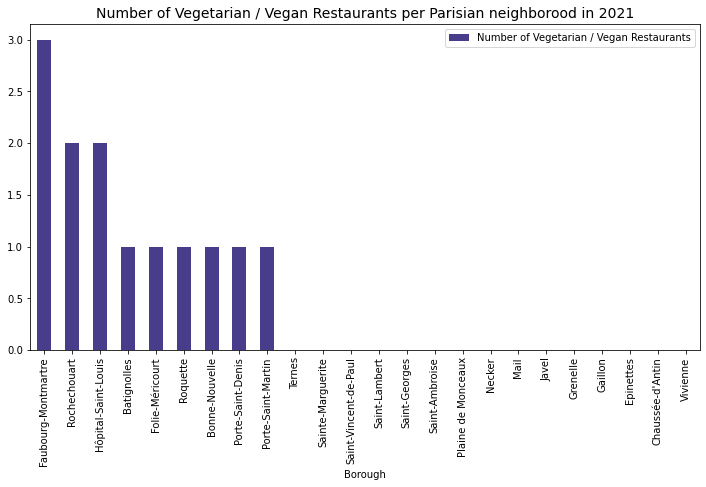

In [26]:
# New libraries to import for data visualization:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the numbers of vegetarian / vegan restaurants per neighborhood:
data_n = pd.DataFrame(paris_merge.groupby('Neighborhood', as_index=True)['Number of Vegetarian / Vegan Restaurants'].sum())
data_n = data_n.sort_values(by ='Number of Vegetarian / Vegan Restaurants', ascending=False)
data_n
data_n.plot(kind='bar', figsize=(12, 6), color='darkslateblue')
plt.title('Number of Vegetarian / Vegan Restaurants per Parisian neighborood in 2021',fontsize=14)
plt.xlabel('Borough')
plt.show()

### III.C.4. First clustering of the neighborhoods with the k-means algorithm according to the percentage of vegetarian / vegan restaurants

As an unsupervised learning, the k-means algorithm is used for clustering. I will use it to segment the neighborhoods of my dataframe into several groups, called “clusters”, in function of the competition variable. Indeed, the neighborhoods will be grouped in function of their similarities, in terms of percentage of vegetarian and vegan restaurants.

First of all, I need to determine the best number of clusters with the “Elbow method”. With this method, I determine a range of potential values for “k”: between 2 and 10. For each of this value, I compute the total within-cluster sum of squared distances. Then, I plot it as a curve on a graph in function of the number of clusters. As a result, I can determine the best “k” value where the curve represents an elbow.

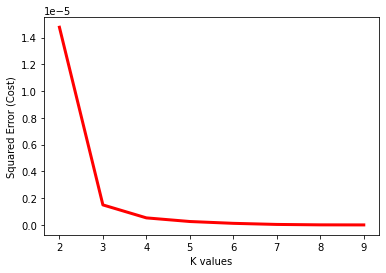

In [27]:
from sklearn.cluster import KMeans

paris_clusters = paris_merge[["% of Vegetarian / Vegan restaurants"]]
error_cost = []

for i in range(2,10):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(paris_clusters)
    except ValueError:
        print("error on line",i)
    
    # Computation of the squared error for the clustered points:
    error_cost.append(KM.inertia_/100)

# Plot of the K values against the squared error cost:
plt.plot(range(2,10), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [28]:
!conda install -c districtdatalabs yellowbrick --yes
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - yellowbrick


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2020.12.8-h06a4308_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


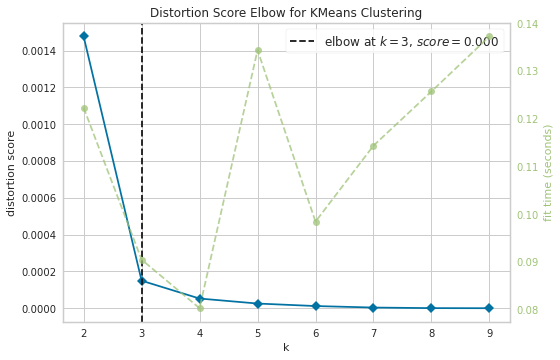

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Instantiation of the clustering model and visualizer:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(paris_clusters) # Data fitted to the visualizer
visualizer.show() # Finalization of the figure

Here, I can see that I have obtained the number 3 as the best "k" value. Consequently, I can cluster the Parisian neighborhoods into 3 groups using the k-means algorithm. I will create a new dataframe, by adding a column with cluster labels to my previous dataframe, and I will visualize the results on a new map.

In [30]:
# Use of k-means to cluster the neighborhoods into 3 clusters:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_clusters)
kmeans.labels_[0:10]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [31]:
# Creation of a new dataframe that includes the clusters:
paris_merge.insert(14, "Competition Cluster Label", kmeans.labels_)
paris_fv1 = paris_merge
paris_fv1['Competition Cluster Label'].astype(int)
paris_fv1

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
7,75009,Opéra,Faubourg-Montmartre,48.873935,2.343253,10730,Mid level,24,Mid level,26,High level,36,High level,0.050847,1,3.0,2.0,3.0,"So Nat,Le Tricycle,La Palanche D'âulac"
4,75009,Opéra,Rochechouart,48.879812,2.344861,10730,Mid level,24,Mid level,26,High level,36,High level,0.043478,1,2.0,2.0,2.0,"Le Potager de Charlotte,42 Degrés"
8,75010,Entrepôt,Hôpital-Saint-Louis,48.876008,2.368123,9730,Low level,24,Mid level,28,High level,31,Mid level,0.020202,2,2.0,2.0,2.0,"Bodhi Vegan,Sol Semilla"
20,75017,Batignolles-Monceau,Batignolles,48.888482,2.313856,10210,Mid level,24,Mid level,24,Mid level,31,Mid level,0.010204,2,1.0,0.0,1.0,My Kitch'n
9,75010,Entrepôt,Porte-Saint-Denis,48.873618,2.352283,9730,Low level,24,Mid level,28,High level,31,Mid level,0.019231,2,1.0,0.0,1.0,Jah Jah
11,75010,Entrepôt,Porte-Saint-Martin,48.871245,2.361504,9730,Low level,24,Mid level,28,High level,31,Mid level,0.023256,2,1.0,1.0,1.0,Elaichi
1,75002,Bourse,Bonne-Nouvelle,48.867150,2.350080,11250,Mid level,27,High level,30,High level,37,High level,0.017544,2,1.0,0.0,1.0,Kitchen
14,75011,Popincourt,Folie-Méricourt,48.867403,2.372965,9980,Mid level,25,High level,27,High level,31,Mid level,0.013514,2,1.0,1.0,1.0,Soya Cantine Bio
15,75011,Popincourt,Roquette,48.857064,2.380364,9980,Mid level,25,High level,27,High level,31,Mid level,0.013889,2,1.0,1.0,1.0,Aujourd’hui & Demain
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,27,High level,30,High level,37,High level,0.000000,0,0.0,0.0,0.0,0


* Analysis of each of the 3 clusters:

In [32]:
# Cluster 0: it contains all the neighborhoods which have none vegan / vegetarian restaurants. It is shown in red color in the map.
cluster0 = paris_fv1.loc[paris_fv1['Competition Cluster Label'] == 0]
cluster0

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
16,75015,Vaugirard,Grenelle,48.850172,2.291853,10030,Mid level,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
22,75017,Batignolles-Monceau,Ternes,48.881178,2.289964,10210,Mid level,24,Mid level,24,Mid level,31,Mid level,0.0,0,0.0,0.0,0.0,0
21,75017,Batignolles-Monceau,Epinettes,48.894943,2.321119,10210,Mid level,24,Mid level,24,Mid level,31,Mid level,0.0,0,0.0,0.0,0.0,0
19,75015,Vaugirard,Javel,48.839060,2.278076,10030,Mid level,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
18,75015,Vaugirard,Saint-Lambert,48.834294,2.296920,10030,Mid level,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
17,75015,Vaugirard,Necker,48.842711,2.310777,10030,Mid level,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
12,75011,Popincourt,Sainte-Marguerite,48.852097,2.388765,9980,Mid level,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
13,75011,Popincourt,Saint-Ambroise,48.862345,2.376118,9980,Mid level,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
10,75010,Entrepôt,Saint-Vincent-de-Paul,48.880735,2.357471,9730,Low level,24,Mid level,28,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0


In [33]:
# Cluster 1: it contains all the neighborhoods which have the highest percentages of vegan / vegetarian restaurants. It is shown in purple color in the map.
cluster1 = paris_fv1.loc[paris_fv1['Competition Cluster Label'] == 1]
cluster1

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
7,75009,Opéra,Faubourg-Montmartre,48.873935,2.343253,10730,Mid level,24,Mid level,26,High level,36,High level,0.050847,1,3.0,2.0,3.0,"So Nat,Le Tricycle,La Palanche D'âulac"
4,75009,Opéra,Rochechouart,48.879812,2.344861,10730,Mid level,24,Mid level,26,High level,36,High level,0.043478,1,2.0,2.0,2.0,"Le Potager de Charlotte,42 Degrés"


In [34]:
# Cluster 2: it contains all the neighborhoods which have medium percentages of vegan / vegetarian restaurants. It is shown in turquoise blue color in the map.
cluster2 = paris_fv1.loc[paris_fv1['Competition Cluster Label'] == 2]
cluster2

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
8,75010,Entrepôt,Hôpital-Saint-Louis,48.876008,2.368123,9730,Low level,24,Mid level,28,High level,31,Mid level,0.020202,2,2.0,2.0,2.0,"Bodhi Vegan,Sol Semilla"
20,75017,Batignolles-Monceau,Batignolles,48.888482,2.313856,10210,Mid level,24,Mid level,24,Mid level,31,Mid level,0.010204,2,1.0,0.0,1.0,My Kitch'n
9,75010,Entrepôt,Porte-Saint-Denis,48.873618,2.352283,9730,Low level,24,Mid level,28,High level,31,Mid level,0.019231,2,1.0,0.0,1.0,Jah Jah
11,75010,Entrepôt,Porte-Saint-Martin,48.871245,2.361504,9730,Low level,24,Mid level,28,High level,31,Mid level,0.023256,2,1.0,1.0,1.0,Elaichi
1,75002,Bourse,Bonne-Nouvelle,48.867150,2.350080,11250,Mid level,27,High level,30,High level,37,High level,0.017544,2,1.0,0.0,1.0,Kitchen
14,75011,Popincourt,Folie-Méricourt,48.867403,2.372965,9980,Mid level,25,High level,27,High level,31,Mid level,0.013514,2,1.0,1.0,1.0,Soya Cantine Bio
15,75011,Popincourt,Roquette,48.857064,2.380364,9980,Mid level,25,High level,27,High level,31,Mid level,0.013889,2,1.0,1.0,1.0,Aujourd’hui & Demain


* Visualization of the 3 clusters:

In [35]:
# Visualization of the resulting 3 clusters:

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(paris_fv1['Latitude'], paris_fv1['Longitude'], paris_fv1['Neighborhood'], paris_fv1['Competition Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Finally, I choose to keep only the Cluster 0 for the pursuit of the analysis because it encompasses all neighborhoods with none vegan / vegetarian restaurants. I make the choice to target these neighborhoods because of the inexistent competition, but without taking into account the delivery perimeter of restaurants of other neighborhoods. I will now reuse the clustering algorithm to narrow the results. Indeed, I will reapply it to obtain new clusters in function of the population variables, and finally, in function of the property price variable.

### III.C.5. Second clustering with the Cluster 0 in function of targeted populations data

I will reuse the k-means algorithm to create sub-clusters in the Cluster 0 in function of targeted populations data. These data refer to the percentages per borough of: 
* People aged 15-29 years and 30-44 years,
* Executives and higher intellectual professions.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':


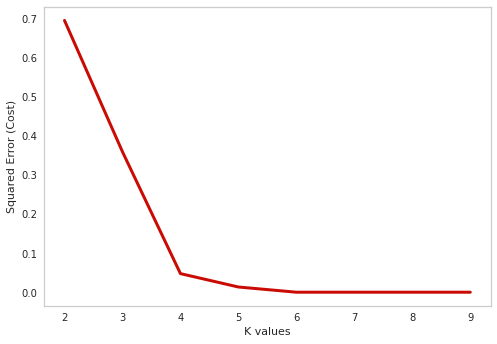

In [36]:
from sklearn.cluster import KMeans

pop_clusters = cluster0[["% of people aged 15-29 years per borough","% of people aged 30-44 years per borough","% of executives and higher intellectual professions per borough"]]
error_cost = []

for i in range(2,10):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(pop_clusters)
    except ValueError:
        print("error on line",i)
    
    # Computation of the squared error for the clustered points:
    error_cost.append(KM.inertia_/100)

# Plot of the K values against the squared error cost:
plt.plot(range(2,10), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:312: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:312: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:312: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)


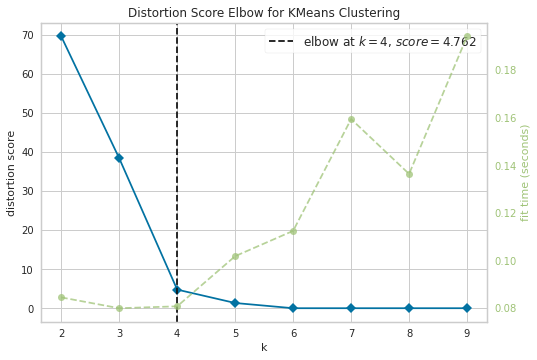

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Instantiate the clustering model and visualizer:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(pop_clusters) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

Thanks to the “Elbow method”, I have found a new best “k” value which is 4.

In [38]:
# Run k-means to cluster the neighborhoods into 4 clusters:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pop_clusters)
kmeans.labels_[0:10]

array([0, 1, 1, 1, 1, 1, 1, 3, 3, 3], dtype=int32)

In [39]:
# Create a new dataframe that includes the clusters:
cluster0.insert(7, "Target Population Cluster Label", kmeans.labels_)
cluster0['Target Population Cluster Label'].astype(int)
cluster0

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Target Population Cluster Label,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
16,75015,Vaugirard,Grenelle,48.850172,2.291853,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
22,75017,Batignolles-Monceau,Ternes,48.881178,2.289964,10210,Mid level,1,24,Mid level,24,Mid level,31,Mid level,0.0,0,0.0,0.0,0.0,0
21,75017,Batignolles-Monceau,Epinettes,48.894943,2.321119,10210,Mid level,1,24,Mid level,24,Mid level,31,Mid level,0.0,0,0.0,0.0,0.0,0
19,75015,Vaugirard,Javel,48.839060,2.278076,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
18,75015,Vaugirard,Saint-Lambert,48.834294,2.296920,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
17,75015,Vaugirard,Necker,48.842711,2.310777,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
12,75011,Popincourt,Sainte-Marguerite,48.852097,2.388765,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
13,75011,Popincourt,Saint-Ambroise,48.862345,2.376118,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
10,75010,Entrepôt,Saint-Vincent-de-Paul,48.880735,2.357471,9730,Low level,3,24,Mid level,28,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0


* Analysis of each of the 4 new clusters:

In [40]:
# Cluster 00: it contains all the neighborhoods with high levels for all targeted populations.
cluster00 = cluster0.loc[cluster0['Target Population Cluster Label'] == 0]
cluster00

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Target Population Cluster Label,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
3,75002,Bourse,Vivienne,48.869100,2.339461,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
2,75002,Bourse,Gaillon,48.869307,2.333432,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0


In [41]:
# Cluster 01: it contains all the neighborhoods with mid levels for all targeted populations.
cluster01 = cluster0.loc[cluster0['Target Population Cluster Label'] == 1]
cluster01

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Target Population Cluster Label,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
16,75015,Vaugirard,Grenelle,48.850172,2.291853,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
22,75017,Batignolles-Monceau,Ternes,48.881178,2.289964,10210,Mid level,1,24,Mid level,24,Mid level,31,Mid level,0.0,0,0.0,0.0,0.0,0
21,75017,Batignolles-Monceau,Epinettes,48.894943,2.321119,10210,Mid level,1,24,Mid level,24,Mid level,31,Mid level,0.0,0,0.0,0.0,0.0,0
19,75015,Vaugirard,Javel,48.839060,2.278076,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
18,75015,Vaugirard,Saint-Lambert,48.834294,2.296920,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
17,75015,Vaugirard,Necker,48.842711,2.310777,10030,Mid level,1,24,Mid level,23,Mid level,32,Mid level,0.0,0,0.0,0.0,0.0,0
23,75017,Batignolles-Monceau,Plaine de Monceaux,48.885044,2.302910,10210,Mid level,1,24,Mid level,24,Mid level,31,Mid level,0.0,0,0.0,0.0,0.0,0


In [42]:
# Cluster 02: it contains all the neighborhoods with at least 2 high levels for people aged 30-44 years and executives / higher intellectual professions.
cluster02 = cluster0.loc[cluster0['Target Population Cluster Label'] == 2]
cluster02

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Target Population Cluster Label,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
6,75009,Opéra,Chaussée-d'Antin,48.873547,2.332269,10730,Mid level,2,24,Mid level,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
5,75009,Opéra,Saint-Georges,48.879934,2.332850,10730,Mid level,2,24,Mid level,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0


In [43]:
# Cluster 3: it contains all the neighborhoods with at least 1 high level for people aged 30-44 years.
cluster03 = cluster0.loc[cluster0['Target Population Cluster Label'] == 3]
cluster03

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Target Population Cluster Label,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
12,75011,Popincourt,Sainte-Marguerite,48.852097,2.388765,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
13,75011,Popincourt,Saint-Ambroise,48.862345,2.376118,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
10,75010,Entrepôt,Saint-Vincent-de-Paul,48.880735,2.357471,9730,Low level,3,24,Mid level,28,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0


Considering these results, I can limit my analysis to the Cluster 00 which includes neighborhoods with the highest levels of targeted populations. However, I can see that the property price is the also highest of the 4 clusters. As a consequence, I will do a last clustering with all neighborhoods that present at least 2 high levels for targeted populations. For that, I will make a concatenation of the neighborhoods of clusters 00, 02 and 03. For the cluster 03, I will specifically suppress the data of the neighborhood “Saint-Vincent-de-Paul”.

### III.C.6. Final clustering with a concatenation of clusters in function of the property price data

For the last clustering, I will reapply the k-means algorithm to segment the obtained neighborhoods in function of the borough price per square metre.

In [46]:
# Concatenation of the 3 selected clusters:
concat_clusters = pd.concat([cluster00, cluster02, cluster03])
concat_clusters

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Target Population Cluster Label,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
3,75002,Bourse,Vivienne,48.869100,2.339461,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
2,75002,Bourse,Gaillon,48.869307,2.333432,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
6,75009,Opéra,Chaussée-d'Antin,48.873547,2.332269,10730,Mid level,2,24,Mid level,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
5,75009,Opéra,Saint-Georges,48.879934,2.332850,10730,Mid level,2,24,Mid level,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
12,75011,Popincourt,Sainte-Marguerite,48.852097,2.388765,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
13,75011,Popincourt,Saint-Ambroise,48.862345,2.376118,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
10,75010,Entrepôt,Saint-Vincent-de-Paul,48.880735,2.357471,9730,Low level,3,24,Mid level,28,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0


In [47]:
concat_clusters = concat_clusters[concat_clusters['Neighborhood']!='Saint-Vincent-de-Paul']
concat_clusters

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Target Population Cluster Label,% of people aged 15-29 years per borough,Level of % of people aged 15-29 yrs,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
3,75002,Bourse,Vivienne,48.869100,2.339461,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
2,75002,Bourse,Gaillon,48.869307,2.333432,11250,Mid level,0,27,High level,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
6,75009,Opéra,Chaussée-d'Antin,48.873547,2.332269,10730,Mid level,2,24,Mid level,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
5,75009,Opéra,Saint-Georges,48.879934,2.332850,10730,Mid level,2,24,Mid level,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
12,75011,Popincourt,Sainte-Marguerite,48.852097,2.388765,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
13,75011,Popincourt,Saint-Ambroise,48.862345,2.376118,9980,Mid level,3,25,High level,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0


In this case, I choose to define myself a value for “k”, that is to say 3, in order to have the most precise results.

In [49]:
price_clusters = concat_clusters[["Borough's price per square metre (in €)"]]

In [50]:
# Run k-means to cluster the neighborhoods into 3 clusters:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(price_clusters)
kmeans.labels_[0:10]

array([1, 1, 1, 0, 0, 2, 2], dtype=int32)

In [51]:
# Create a new dataframe that includes the clusters:
concat_clusters.insert(7, "Property Price Cluster Label", kmeans.labels_)
concat_clusters['Property Price Cluster Label'].astype(int)
concat_clusters

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Property Price Cluster Label,Target Population Cluster Label,% of people aged 15-29 years per borough,...,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,1,0,27,...,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
3,75002,Bourse,Vivienne,48.869100,2.339461,11250,Mid level,1,0,27,...,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
2,75002,Bourse,Gaillon,48.869307,2.333432,11250,Mid level,1,0,27,...,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
6,75009,Opéra,Chaussée-d'Antin,48.873547,2.332269,10730,Mid level,0,2,24,...,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
5,75009,Opéra,Saint-Georges,48.879934,2.332850,10730,Mid level,0,2,24,...,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
12,75011,Popincourt,Sainte-Marguerite,48.852097,2.388765,9980,Mid level,2,3,25,...,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
13,75011,Popincourt,Saint-Ambroise,48.862345,2.376118,9980,Mid level,2,3,25,...,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0


* Analysis of each of the 3 final clusters:

In [52]:
# Cluster 0C0: it contains the neighborhoods of the Opéra borough which presents the medium level of price per square meter in comparison to the 2 other clusters. It is shown in red on the map.
cluster0C0 = concat_clusters.loc[concat_clusters['Property Price Cluster Label'] == 0]
cluster0C0

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Property Price Cluster Label,Target Population Cluster Label,% of people aged 15-29 years per borough,...,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
6,75009,Opéra,Chaussée-d'Antin,48.873547,2.332269,10730,Mid level,0,2,24,...,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0
5,75009,Opéra,Saint-Georges,48.879934,2.332850,10730,Mid level,0,2,24,...,26,High level,36,High level,0.0,0,0.0,0.0,0.0,0


In [53]:
# Cluster 0C1: it contains the neighborhoods of the Bourse borough which presents the highest level of price per square meter in comparison to the 2 other clusters. It is shown in purple on the map.
cluster0C1 = concat_clusters.loc[concat_clusters['Property Price Cluster Label'] == 1]
cluster0C1

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Property Price Cluster Label,Target Population Cluster Label,% of people aged 15-29 years per borough,...,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
0,75002,Bourse,Mail,48.868008,2.344699,11250,Mid level,1,0,27,...,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
3,75002,Bourse,Vivienne,48.869100,2.339461,11250,Mid level,1,0,27,...,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0
2,75002,Bourse,Gaillon,48.869307,2.333432,11250,Mid level,1,0,27,...,30,High level,37,High level,0.0,0,0.0,0.0,0.0,0


In [57]:
# Cluster 0C2: it contains the neighborhoods of the Popincourt borough which presents the lowest level of price per square meter in comparison to the 2 other clusters. It is shown in turquoise blue on the map.
cluster0C2 = concat_clusters.loc[concat_clusters['Property Price Cluster Label'] == 2]
cluster0C2

,Postal code,Borough,Neighborhood,Latitude,Longitude,Borough's price per square metre (in €),Level of price per square metre,Property Price Cluster Label,Target Population Cluster Label,% of people aged 15-29 years per borough,...,% of people aged 30-44 years per borough,Level of % of people aged 30-44 yrs,% of executives and higher intellectual professions per borough,Level of % of executives and higher intellectual professions,% of Vegetarian / Vegan restaurants,Competition Cluster Label,Number of Vegetarian / Vegan Restaurants,Number of V/V restaurants with a delivery service,Number of V/V restaurants with take-away and/or click & collect services,List of Vegetarian / Vegan Restaurants
12,75011,Popincourt,Sainte-Marguerite,48.852097,2.388765,9980,Mid level,2,3,25,...,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0
13,75011,Popincourt,Saint-Ambroise,48.862345,2.376118,9980,Mid level,2,3,25,...,27,High level,31,Mid level,0.0,0,0.0,0.0,0.0,0


* Visualization of the 3 clusters:

In [56]:
# Visualization of the resulting 3 clusters:

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(concat_clusters['Latitude'], concat_clusters['Longitude'], concat_clusters['Neighborhood'], concat_clusters['Property Price Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## IV. RESULTS OF THE DATA ANALYSIS

Thus, I have obtained 3 final clusters. So, I want to determine in which of them we can find the best neighborhood to invest in. The 3 clusters correspond to:
* Cluster 0C2: in the Popincourt borough, the neighborhoods Sainte-Marguerite and Roquette present the lowest real estate price, but also the lowest mean of targeted population percentages. As a result, I decide to exclude them from the scope.
* Cluster 0C1: in the Bourse borough, the neighborhoods Gaillon, Mail et Vivienne present the highest levels of targeted population in comparison to the 2 other clusters. However, the price per square meter is also the most important. Consequently, these neighborhoods appear to be more expensive compared to the others.
* Cluster 0C0: in the Opéra borough, the neighborhoods Chaussée d'Antin and Saint-Georges seem to offer a compromise between the two previous clusters. Indeed, they present the second highest level of targeted populations and the second lowest price per square meter.

## V. Discussion:

Moreover, the map gives additional information. As we can see, clusters 0C1 and 0C0 are bordering in the northern center of Paris, whereas the cluster 0C2 is far away from them in the eastern mid-center. Focusing on the clusters 0C1 and 0C0, I can see that the neighborhood Chaussée d'Antin from the cluster 0C0 is the only one at the junction between the 2 boroughs of Opéra and Bourse, and is adjacent to neighborhoods Gaillon and Vivienne (and knowing that Mail is bordering Vivienne). So, its position would be very interesting for the delivery and click & collect services. However, the Opéra borough encompasses also the two neighborhoods that present the highest percentage of vegan / vegetarian restaurants in Paris. So, an important competition will be closed.

In summary, I recommend to the entrepreneur to consider the neighborhood of Chaussée d’Antin or the neighborhood of Gaillon:
* The entrepreneur can target the Chaussée d'Antin neighborhood, more affordable but with very high nearby competition. This competition could also be seen as a factor of success because the client would be sure to find a high level of consumers.
* Or, he can prefer the Gaillon neighborhood, more expensive, but which is located a little far away from the competitors and which concentrate a high level of targeted populations.

In the next step, the entrepreneur could look at specific premises to install his kitchen in both neighborhoods and compare prices. He could also make a benchmark of the nearby competition to analyze the best practices of the vegetarian / vegan restaurants.

## VI. Conclusion

During this project, I have used the Foursquare API and different methods of data science and machine learning to obtain a final recommendation on where to open a virtual restaurant. My analysis can be compared to a "Russian doll" as I have conducted a more and more precise and narrowed research using the k-means clustering algorithm. 

To conclude, this final project has permitted to develop a realistic data science project leading to a final recommendation. Moreover, I have measured the great interest of what an algorithm can bring to an analysis.